# M07_T01: Classification
***Exercicis per practicar amb regressions.***
 

## Nivell1 - 


### Exercici 0 - Les dades
***Parteix el conjunt de wineData i revisem el Datset, afegim labels i fem una revisio de dades inicials***

* 1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

* 2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
* 3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results using the leave-one-out technique)

   In a classification context, this is a well posed problem 
   with "well behaved" class structures. A good data set 
   for first testing of a new classifier, but not very 
   challenging.

   (2) 
   S. Aeberhard, D. Coomans and O. de Vel,
   "THE CLASSIFICATION PERFORMANCE OF RDA"
   Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Journal of Chemometrics).

   Here, the data was used to illustrate the superior performance of
   the use of a new appreciation function with RDA. 

* 4. Relevant Information:

   ***-- These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. ***

   ***-- I think that the initial data set had around 30 variables, but 
      for some reason I only have the 13 dimensional version. 
      I had a list of what the 30 or so variables were, but a.) 
      I lost it, and b.), I would not know which 13 variables
      are included in the set.***

   ***-- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )***
    
 	* 1) Alcohol
 	* 2) Malic acid
 	* 3) Ash
	* 4) Alcalinity of ash  
 	* 5) Magnesium
	* 6) Total phenols
 	* 7) Flavanoids
 	* 8) Nonflavanoid phenols
 	* 9) Proanthocyanins
	* 10)Color intensity
 	* 11)Hue
 	* 12)OD280/OD315 of diluted wines
 	* 13)Proline           

* 5. Number of Instances

    ***Class 1 59
	class 2 71
	class 3 48***

* 6. Number of Attributes 
	
	13

* 7. For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)

* 8. Missing Attribute Values:

	None

* 9. Class Distribution: number of instances per class

    class 1 59
	class 2 71
	class 3 48


In [1]:
#Importem les llibreries
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro
from sklearn.decomposition import PCA
%matplotlib inline


pd.options.display.max_columns=None
pd.options.display.max_rows=30

*** Com que el fitxer CSV no te les capçaleres dels atributs el hi afegim nosaltres en el read_CSV segons les pecificacions***

In [2]:
columNames=["CLAS","ALCO","MALIC","ASH","ASHALCA","MAGN","PHENOLS","FLAVA","NONFLAVAFEN","PROANTH","COLORINT","HUE","OD280380","PROL"]
WinDf=pd.read_csv('wineData.txt',sep=',', header=None,encoding='utf8',names=columNames,index_col=None)

WinDfCopy=WinDf.copy()

In [3]:
#Observem el tipus de dades
WinDf.dtypes

CLAS             int64
ALCO           float64
MALIC          float64
ASH            float64
ASHALCA        float64
MAGN             int64
PHENOLS        float64
FLAVA          float64
NONFLAVAFEN    float64
PROANTH        float64
COLORINT       float64
HUE            float64
OD280380       float64
PROL             int64
dtype: object

In [4]:
# Veiem la descripció dela atributs, tots ells numerics , no hem de fer transformacions
WinDf.describe()

,CLAS,ALCO,MALIC,ASH,ASHALCA,MAGN,PHENOLS,FLAVA,NONFLAVAFEN,PROANTH,COLORINT,HUE,OD280380,PROL
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
WinDf

,CLAS,ALCO,MALIC,ASH,ASHALCA,MAGN,PHENOLS,FLAVA,NONFLAVAFEN,PROANTH,COLORINT,HUE,OD280380,PROL
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


***Creo unes funcions que ja he utilitzat en exeercicis anteriors que m'ajudadaran a fer una exploracio i nalisis de dades***

In [6]:

#Funció per mostrar diagrama de caixes per totes les columnes numeriques de la nostra mostra original
def mostraBoxPlot(dataSet,numericColumns):  
    numericColsList = list(numericColumns)
    dec, num = math.modf(len(numericColsList)/4)
    if dec == 0: rows = int(num)
    else: rows = int(num+1)
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,rows*4))
    for i, col in zip(range(len(numericColsList)), numericColsList):
        plt.subplot(rows, 5, i+1)
        ax = sns.boxplot(x=col, data=dataSet, orient='h', linewidth=1 , width=.5)
        plt.title(col, y=.85)
        plt.xlabel("")
    plt.show()

In [7]:
def distNormColumnes(dataSet, col):
    # Valores de la media (mu) y desviación típica (sigma) de los datos
    mu, sigma = stats.norm.fit(dataSet[col])
    # Valores teóricos de la normal en el rango observado
    x_hat = np.linspace(min(dataSet[col]), max(dataSet[col]), num=100)
    y_hat = stats.norm.pdf(x_hat, mu, sigma)

    # Gráfico
    ig, ax = plt.subplots(figsize=(7,4))
    ax.plot(x_hat, y_hat, linewidth=2, label='normal')
    ax.hist(x=dataSet[col], density=True, bins=30, color="#3182bd", alpha=0.5)
    ax.plot(dataSet[col], np.full_like(dataSet[col], -0.01), '|k', markeredgewidth=1)
    ax.set_title('Distribución {0}'.format(col))
    ax.set_xlabel(col)
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend();
    
    return

***Reviso la distribució de les columnes per observar Outliers***

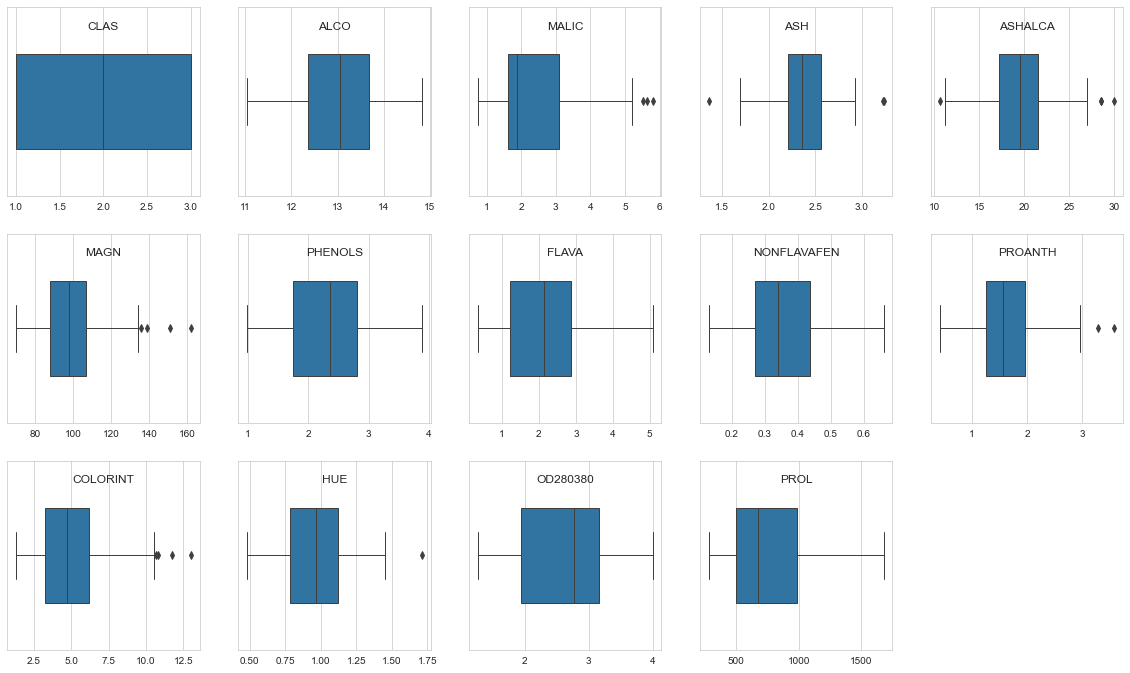

In [8]:
mostraBoxPlot(WinDf,columNames)


***Comprovem si la columna Objetiu segueix una distribució normal***

In [9]:
#Comprovem nulls, de les variables que en tenen, i observem que la nostra variable objectiu té 8387 NaNs
WinDf.isna().sum()[WinDf.isna().sum() != 0]

Series([], dtype: int64)

In [ ]:
WinDf

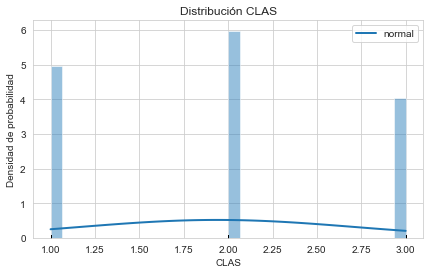

In [10]:
distNormColumnes(WinDf, "CLAS")

In [11]:
print('Kursotis:', stats.kurtosis(WinDf['CLAS']))
print('Skewness:', stats.skew(WinDf['CLAS']))

Kursotis: -1.319440380142014
Skewness: 0.1065236775609526


* Revisem les distribucions i les correlacions entre columnes

* ***Revisem els valors nuls per cada columna i veiem que no hi han***

In [12]:

#Comprovem nulls, de les variables que en tenen, i observem que la nostra variable objectiu té 8387 NaNs
WinDf.isna().sum()[WinDf.isna().sum() != 0]

Series([], dtype: int64)

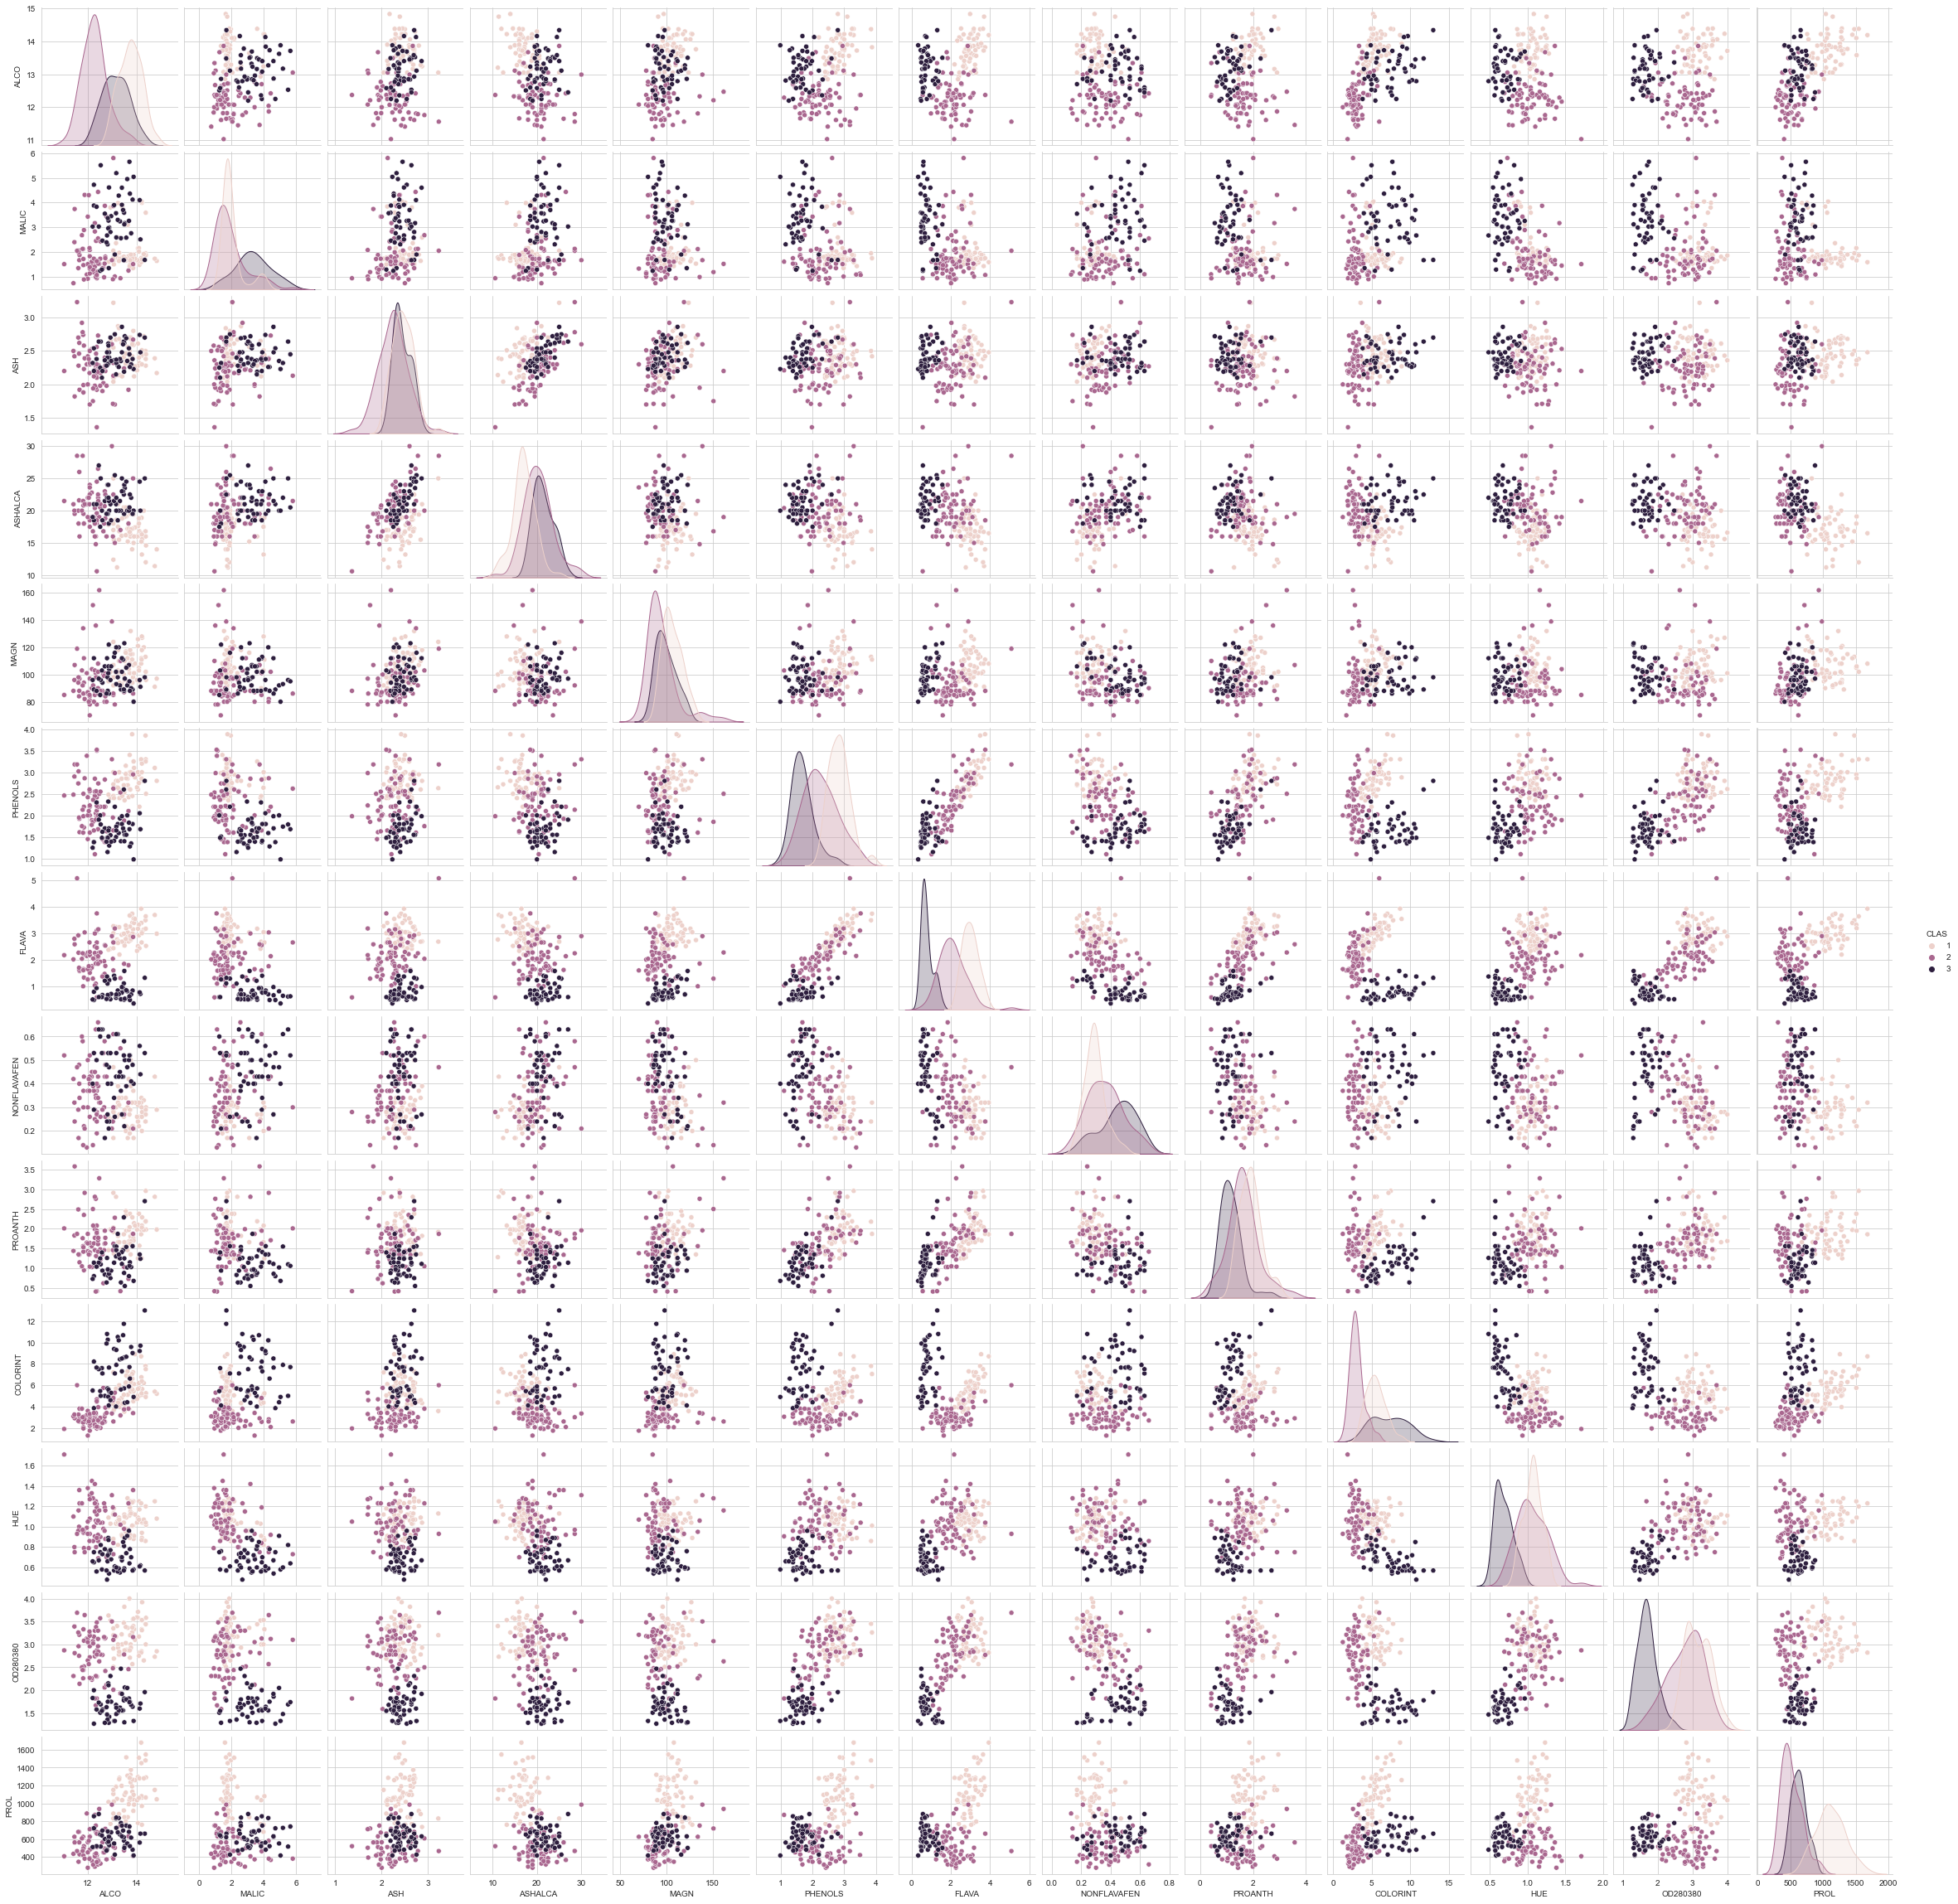

In [13]:
# Plotting the variables against each other
import seaborn as sns
sns.pairplot(WinDf,hue='CLAS')

***Establimt els dos conjunts train/test basat en una proporció de 70/30***

In [14]:

import math
#from scipy.stats import shapiro
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import category_encoders

In [15]:
# split imbalanced dataset into train and test sets without stratification
from sklearn.model_selection import train_test_split


In [16]:
# Establim el set de predictors i els sets de targets

y = WinDf['CLAS']
X = WinDf.drop(columns='CLAS')

#Com el nostre conjunt de dades es molt gran podem fer un train del 65% i un test del 35%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=9)


# verifiquem conjunts resultatnts

perTrain = round(100 * len(X_train) / (len(X)))
perTest  = round(100 * len(X_test) / (len(X)))
                 
print("Set de Train: Tamany:  {0}--{1}%".format(len(X_train),perTrain))
print("Set de Test : Tamany:  {0}--{1}%".format(len(X_test),perTest))   


Set de Train: Tamany:  124--70%
Set de Test : Tamany:  54--30%


### Exercici 1
***Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.***

***Decission Trees***

In [18]:
#Carreguem llibreries per decission treesx

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [19]:
decTreeClas = DecisionTreeClassifier()

# Train Decision Tree Classifer
decTreeClas = decTreeClas.fit(X_train,y_train)

#Preddict the response for test dataset
y_predDecTree = decTreeClas.predict(X_test)

In [20]:
# Model Accuracy, how often is the classifier correct?
exactitutDecTree=metrics.accuracy_score(y_test, y_predDecTree)
print("Exactitud:",exactitutDecTree)

Exactitud: 0.9444444444444444


* ***Metode 2 K-Nearest Neighbors-***


In [21]:
#Importem la llibreria del mètode de regresio lineal
from sklearn.neighbors import KNeighborsClassifier
KNNClas = KNeighborsClassifier(n_neighbors=5)
KNNClas.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
y_predKNN = KNNClas.predict(X_test)

* ***Evaluating the Algorithm
For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:***

In [51]:
# Model Accuracy, how often is the classifier correct?
exactitutKNN=metrics.accuracy_score(y_test, y_predKNN)
print("Exactitud:",exactitutKNN)

Exactitud: 0.7222222222222222


In [24]:
errorKNN = []

# Calcul del error en tre K de 1 a 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errorKNN.append(np.mean(pred_i != y_test))

***Observem gràficament l'evoluciob de  la k amb el error***

Text(0, 0.5, 'Mean Error')

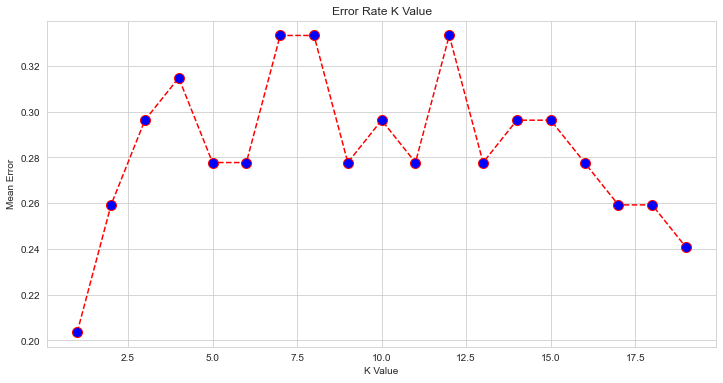

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), errorKNN, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

* ***Metode 3 SVC ***

In [26]:
#Importem svm model
from sklearn import svm

#Creem  a svm Classifier amb Krenel lineal
SVCClass = svm.SVC(kernel='linear') 

#Entrenem els models
SVCClass.fit(X_train, y_train)

#Apliquem al test
y_predSVCClass = SVCClass.predict(X_test)

In [103]:
#Importem scikit-learn metrics module for accuracy calculation
from sklearn import metrics


exactitutSVC=metrics.accuracy_score(y_test, y_predSVCClass)
print("Exactitud:",exactitutSVC)

Exactitud: 0.9814814814814815


* ***Metode 3 SVC with polynomial kefnet***

In [28]:

#Create a svm Classifier amb Polinomial lieal
SVCClassPol = svm.SVC(kernel='poly') # Linear Kernel

#Entrenen el model using the training sets
SVCClassPol.fit(X_train, y_train)

#Apliquem al conjunt de test
y_predSVCClassPol = SVCClassPol.predict(X_test)

In [29]:
print("Exactitut:",metrics.accuracy_score(y_test, y_predSVCClassPol))

Accuracy: 0.6851851851851852


* ***Dels 3 models provats , el millor en quat a la exactitudd  es el SVC amb el Kernel lineal, mentre que el KNN es el que ens dona una exactitud mes baixa, el metode de Decissiosn tree tambè dpna una exactitut molt elevada***

### Exercici2
***Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.***


***Calculem mètrique mes avançades , la matriu de confusio , la precisió i el recall o sensibilitat per veure altres factors a part de l'exactitu que poden influir en veure quin es el model millor***

In [30]:


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predDecTree))
print('Metriques avançades per Decission Tree\n--------------------------------------------')

print(classification_report(y_test, y_predDecTree))

[[24  1  0]
 [ 0 15  0]
 [ 0  2 12]]
Metriques avançades per Decission Tree
--------------------------------------------
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        25
           2       0.83      1.00      0.91        15
           3       1.00      0.86      0.92        14

    accuracy                           0.94        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.95      0.94      0.95        54



***Veiem que tant la precisió com el recall son molt bones amb aquest model***

In [31]:
print(confusion_matrix(y_test, y_predKNN))
print('Metriques avançades per Decission KNN\n--------------------------------------------')
print(classification_report(y_test, y_predKNN))

[[24  0  1]
 [ 1  9  5]
 [ 3  5  6]]
Metriques avançades per Decission KNN
--------------------------------------------
              precision    recall  f1-score   support

           1       0.86      0.96      0.91        25
           2       0.64      0.60      0.62        15
           3       0.50      0.43      0.46        14

    accuracy                           0.72        54
   macro avg       0.67      0.66      0.66        54
weighted avg       0.71      0.72      0.71        54



In [32]:
print(confusion_matrix(y_test, y_predSVCClass))
print('Metriques avançades per Decission SVC\n--------------------------------------------')
print(classification_report(y_test, y_predSVCClass))



[[24  1  0]
 [ 0 15  0]
 [ 0  0 14]]
Metriques avançades per Decission SVC
--------------------------------------------
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        25
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



* ***Tenin en compte les mètriques avançades veiem que erl SVC amb el Kernel lineal donda tambe una precisissió i una sensibilitat molt elevada , propera a l'1 el que inidca que segueix sent el millor model***

### Exercici 3
***Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.***




In [33]:
#Fem un tunning pel algoristme KNN fent una graella de busqueda 

from sklearn.model_selection import GridSearchCV
models_KNN = KNeighborsClassifier(algorithm='auto')
parametres_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}                
# graella de busquedaq
graella_KNN = GridSearchCV(estimator=models_KNN,param_grid=parametres_KNN,scoring = 'accuracy',n_jobs = -1,cv = 5)

In [34]:


KNN_Graella=graella_KNN.fit(X_train, y_train)
y_pred_KNN_Graella =KNN_Graella.predict(X_test)


print(graella_KNN.best_params_ ) 
#Mirem les condicions del millor resuktat
print('Millor exactitut - KNN:', KNN_Graella.best_score_ )



{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Millor exactitut - KNN: 0.7753333333333333


In [53]:
exactitutKNNGraella=metrics.accuracy_score(y_test, y_pred_KNN_Graella)
print('Exactitut  - KNN - Defecte:',exactitutKNN) 
print('Exactitut - KNN - Graella',exactitutKNNGraella) 




Exactitut  - KNN - Defecte: 0.7222222222222222
Exactitut - KNN - Graella 0.8148148148148148


* ***Hem augmentat la exactitud fen servirt els paràmetres per la millor avaluació i hem passat de '.72 a 0.81'***

In [36]:
print(confusion_matrix(y_test, y_predKNN))
print('Metriques avançades per Decission KNN Defecte\n--------------------------------------------')
print(classification_report(y_test, y_predKNN))

print(confusion_matrix(y_test, y_pred_KNN_Graella))
print('Metriques avançades per Decission KNN Graella\n--------------------------------------------')
print(classification_report(y_test, y_pred_KNN_Graella))

[[24  0  1]
 [ 1  9  5]
 [ 3  5  6]]
Metriques avançades per Decission KNN Defecte
--------------------------------------------
              precision    recall  f1-score   support

           1       0.86      0.96      0.91        25
           2       0.64      0.60      0.62        15
           3       0.50      0.43      0.46        14

    accuracy                           0.72        54
   macro avg       0.67      0.66      0.66        54
weighted avg       0.71      0.72      0.71        54

[[23  0  2]
 [ 2 11  2]
 [ 1  3 10]]
Metriques avançades per Decission KNN Graella
--------------------------------------------
              precision    recall  f1-score   support

           1       0.88      0.92      0.90        25
           2       0.79      0.73      0.76        15
           3       0.71      0.71      0.71        14

    accuracy                           0.81        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.81      0.81    

* ***Entrenament SVC fent  servir una graella ***

In [37]:
# Algoristne
from sklearn.svm import SVC
SVC = SVC()

C_range = np.logspace(-1, 1, 3)
print(f'El rang de valors C es  {C_range}')
# Valors gamma 
gamma_range = np.logspace(-1, 1, 3)
print(f'El rang de valors gamma es {gamma_range}')


El rang de valors C es  [ 0.1  1.  10. ]
El rang de valors gamma es [ 0.1  1.  10. ]


In [112]:


# Define the search space
param_SVCGraella = { 
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['linear','rbf', 'poly'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": gamma_range.tolist()+['scale', 'auto']
    }
# Definim el criteri
scoring = ['accuracy']
# Definim  condicions de la graella de busqueda 
SVCGraella = GridSearchCV(estimator=SVC, 
                           param_grid=param_SVCGraella, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           verbose=0
                         )
# Entrenem amb la raella de busqueda
y_predSVCGraella= SVCGraella.fit(X_train, y_train)


In [113]:

print(f'La millor extactitud es : {y_predSVCGraella.best_score_:.4f}')
# Mostrem the hyperparameters for the best score
print(f'Els hiper paràmetres corresponents a millor resultat son:  {y_predSVCGraella.best_params_}')
# Mostrem la excatitut aplicada al conjunt de dades de test
print(f'La exactitut pel conjunt de test es: {SVCGraella.score(X_test, y_test):.4f}')

La millor extactitud es : 0.9360
Els hiper paràmetres corresponents a millor resultat son:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
La exactitut pel conjunt de test es: 0.9815


* ***En aquest cas no millorem els resultats del SVC per defecte***



### Exercici 4
***Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.***



***farem les cross validation pels 3 dels  metodes empleats prediccions amb Decission Tree,SVC Linear kernel,KNN***

* ***SVC Cross Validation***

In [40]:
# Importem les llibreries
from sklearn.model_selection import cross_val_score, cross_val_predict

In [114]:

# Fem un cross valiation de 6 plegs
scoresSVC = cross_val_score(SVCClass, X, y, cv=6)
print ('Resultats de la validació creuada:', scoresSVC)

Resultats de la validació creuada: [0.86666667 0.9        0.93333333 0.96666667 1.         1.        ]


In [116]:
ySVCCrossPredict = cross_val_predict(SVCClass, X, y, cv=6)
exactitudSVCCross = metrics.accuracy_score(y, ySVCCrossPredict)
print('Exactitud SVC amb validació creuada:', exactitudSVCCross)
print("Exactitud SVC amb Train/Tesrt:",exactitutSVC)

Exactitud SVC amb validació creuada: 0.9438202247191011
Exactitud SVC amb Train/Tesrt: 0.9814814814814815


***Al fer el cross validation la exactitut del model ha baixat però molt lleugerament el que indica que el metode es bastant correcte***

* Decission Tree Cross Validation

In [43]:
# Perform 6-fold cross validation
scoresDecTree = cross_val_score(decTreeClas, X, y, cv=6)
print ('Cross-validated scores:', scoresDecTree)




Cross-validated scores: [0.93333333 0.83333333 0.83333333 0.9        0.93103448 0.79310345]


In [117]:
yDecTreeCrossPredict = cross_val_predict(decTreeClas, X, y, cv=6)
exactitudDecTreeCross = metrics.accuracy_score(y, yDecTreeCrossPredict)
print('Exactitud de la validació creuada:', exactitudDecTreeCross)
print('Exactitud Train/Test:',exactitutDecTree)

Exactitud de la validació creuada: 0.8651685393258427
Exactitud Train/Test: 0.9444444444444444


***Al fer el cross validation la exactitut del model ha baixat de forma mes important pero encara mostra valors correctes***

* KNN Cross Validation

In [ ]:
KNNClas
# Fem un cross valiation de 6 plegs
scoresKNN = cross_val_score(graella_KNN, X, y, cv=6)
print ('Cross-validated scores:', scoresKNN)



In [55]:
yKNNCrossPredict = cross_val_predict(graella_KNN, X, y, cv=6)
exactitudKNNCross = metrics.accuracy_score(y, yKNNCrossPredict)
print('Exactitud con el cross validation:', exactitudKNNCross)
print('Exactitud amb el Train/test:', exactitutKNNGraella)

Exactitud con el cross validation: 0.8314606741573034
Exactitud amb el Train/test: 0.8148148148148148


### Exercici 5
***Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)***

***Aplico el standar Scaler a totes les mostres train i test***


In [63]:
#finalment apliquem la transformació lineal d'estandarització a totes les dades
standardscaler = preprocessing.StandardScaler()

index = X_test.index
X_testConv = pd.DataFrame(standardscaler.fit_transform(X_test), columns=X_test.columns, index=index)

index = X_train.index
X_trainConv = pd.DataFrame(standardscaler.fit_transform(X_train), columns=X_train.columns, index=index)


index =X.index
X_Total=pd.DataFrame(standardscaler.fit_transform(X), columns=X.columns, index=index)


***-----------------Comprovem la correlacio entre les variables independnetss---------------***

<AxesSubplot:>

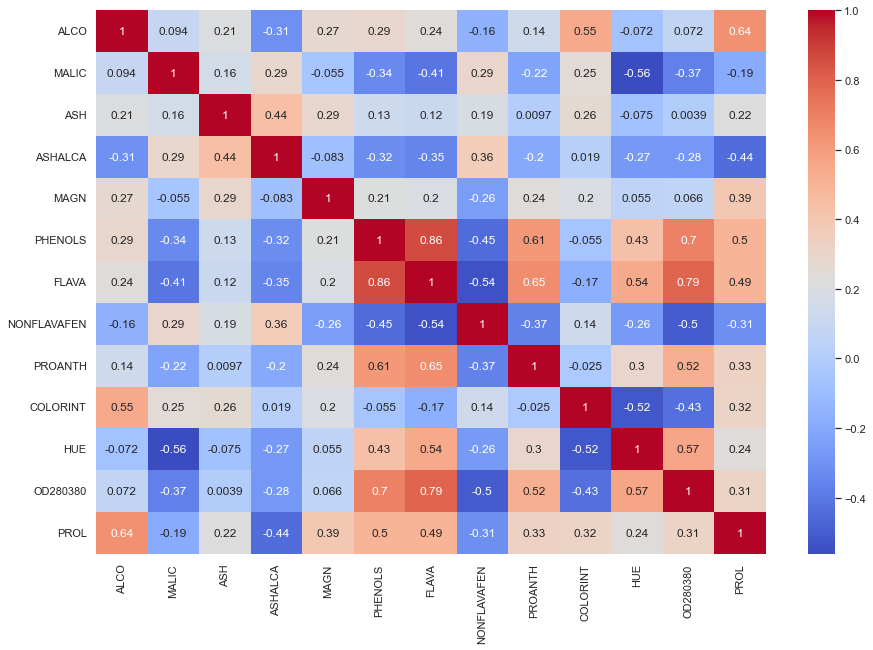

In [83]:
plt.subplots(figsize=(15, 10))
sns.heatmap(X_Total.corr(), annot = True, cmap = 'coolwarm')

***Fem servir el principal components analisis per reduir la complexitat de de les variables***

In [106]:
# Fem un PCA per determinar amb quines colkumnes ens quedem i que teten un representacio suficientment alta dels resultats
from sklearn.decomposition import PCA

pca = PCA() 
#Aplliquem el PCA al conjunt de variables de train una vegada standaritzzaes
winePCAResults = pca.fit(X_trainConv) # applies PCA on predictor variables


***Observem la evolució per component***

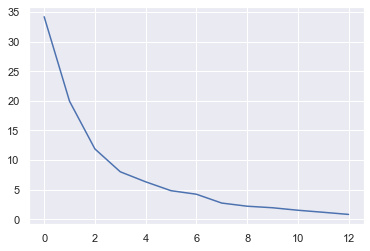

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()


plt.plot(winePCAResults.explained_variance_ratio_*100) # scree plot
plt.show()

***Observem que reduint la complexitat de 12  variables a 2 obtenim una exactitud similar per tenin un model molt me simple***

In [108]:
pd.DataFrame(winePCAResults.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.124362,-0.222469,-0.008617,-0.217200,0.139347,0.413808,0.431964,-0.281336,0.316958,-0.101694,0.292402,0.389523,0.288726
1,-0.480354,-0.225130,-0.288853,0.055354,-0.337991,-0.034993,0.009356,0.031744,-0.008456,-0.519292,0.282347,0.157761,-0.375734
2,-0.207115,0.092629,0.612982,0.618487,0.206018,0.127642,0.151829,0.182373,0.171531,-0.092569,0.048461,0.130422,-0.133609
3,-0.021249,0.584368,-0.228907,0.050023,-0.348686,0.193743,0.150590,-0.097133,0.430258,0.058838,-0.408482,0.152280,-0.182485
4,-0.243692,-0.046331,-0.142173,0.124919,0.519991,-0.116473,-0.062762,-0.705934,0.034754,-0.084472,-0.253746,-0.115382,-0.174266
5,-0.275999,-0.438212,-0.158449,-0.053967,0.104830,0.082986,0.004809,0.297008,0.560834,0.397317,-0.076995,-0.329020,-0.105289
6,-0.172493,0.468107,-0.155923,-0.292860,0.532212,-0.086156,-0.130501,0.373777,0.193558,-0.317271,0.186878,-0.014886,0.142687
7,-0.417637,-0.058556,0.252609,-0.457820,0.072292,0.305480,0.204084,0.149101,-0.388376,0.015798,-0.464458,0.111921,-0.083558
8,0.465087,-0.180621,-0.344122,0.164840,0.347002,0.181022,0.015414,0.302219,-0.147887,-0.040919,-0.190173,0.306905,-0.454779
9,-0.029868,0.298338,-0.080755,-0.016249,0.061668,0.407625,0.202907,-0.104147,-0.260620,0.283610,0.491263,-0.399912,-0.362921


*** Apliquen el model SVC al conjunt de dades resusltants de reduir xcomplexitat de 12 a 2 variables***

In [119]:

# creem un nou array amb les variables de tests
newLatentVar = winePCAResults.transform(X_testConv) 
#Apliquem el metode amb les variables de test transformades
pred = SVCClassPCA.predict(newLatentVar[:,:2])
print('Confusion matrix:')
print(confusion_matrix(pred,y_test))
print('\nAccuracy:')
print(metrics.accuracy_score(pred,y_test))




Confusion matrix:
[[25  2  0]
 [ 0 13  0]
 [ 0  0 14]]

Accuracy:
0.9629629629629629


***Comparem amb el model sense PCA , veiem que l'exactitut es igual pero hi han lleugeres varaiacions a la confussion matrix***

In [111]:
#Entreno el model
SVCClass.fit(X_trainConv, y_train)

#Predict the response for test dataset
y_predSVCClassTrans = SVCClass.predict(X_testConv)

# Model Accuracy: how often is the classifier correct?
exactitutSVCTrans=metrics.accuracy_score(y_test, y_predSVCClassTrans)
print(metrics.accuracy_score(y_predSVCClassTrans,y_test))
print(confusion_matrix(y_predSVCClassTrans,y_test))

0.9629629629629629
[[23  0  0]
 [ 2 15  0]
 [ 0  0 14]]


***Reduint les variables der 12 a 2 tenim un model molt mes simple i amb una pèrdua defectivitat molt lleu***